In [10]:
from data import read_csv
import seaborn as sns

In [2]:
train_path = "..//data//train.csv"
test_path = "..//data//test.csv"

In [4]:
header,train,d = read_csv(train_path)
_,test,_ = read_csv(test_path,test=True,Dict = d)
print(test[0])

['ID58593', 0.341731678878033, 0.0, 0.586538461538462, 2, 4076, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 796, 3, 0, 5, 0, 4.6, 3445, 1515, 1475, 1185, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
class NaiveBayesClassifier:
    def __init__(self):
        self.cat = [4,7,8,9,10,11,12,14,15,16,17,18,19,22,24,30,31,32,33,34,35,36,37,38,39,40,41]
        self.num = []
        self.e = 2.71828182846
        self.pi = 3.14159265359
        for i in range(1,43): #ID and is_claim is excluded
            if i not in self.cat:
                self.num.append(i)
        print("NaiveBayesClassfier is created")
        
    def fit(self,data):
        self.data = data
        self.posterior = dict()
        self.claim = [0,0] #Calculation of is_claim in categorical fit
        for d in self.data:
            claim = d[43]
            self.claim[claim] += 1 
        self.categorical_prob()
        self.numerical_prob()
        
    
    def categorical_prob(self):
        # Initialize
        for c in self.cat:
            self.posterior[c] = dict()
        
        for d in self.data:
            claim = d[43]
            for c in self.cat:
                if d[c] not in self.posterior[c].keys():
                    self.posterior[c][d[c]]=[0,0]
                self.posterior[c][d[c]][claim] += 1
        
        # Assume all features are independent
        # P(x_i|C_j) = count(x_i & C_j)/count(C_j)
        for k,v in self.posterior.items():
            for x,count in v.items():
                count[0] = count[0]/self.claim[0]
                count[1] = count[1]/self.claim[1]
            #print(k,v)
        
    def numerical_prob(self):
        # Assume all the continuous features are gaussian distribution
        # take all the data into a list
        subdata = dict()
        for c in self.num:
            # The first subarray store the data of is_claim=0, the second store the data of is_claim=1
            subdata[c] = [[0],[0]] # The first element of each subarray is the sum of the rest elements

        for d in self.data:
            for c in self.num:
                claim = d[43]
                subdata[c][claim][0] += d[c]
                subdata[c][claim].append(d[c])

        # Calculate mean and variance
        for c in self.num:
            self.posterior[c] = [[0,1],[0,1]] # mean and variance of is_claim = 0, mean and variance of is_claim = 1
            for i in range(2):
                mean = subdata[c][i][0]/(len(subdata[c][i])-1)
                variance = 0
                for j in range(1,len(subdata[c][i])):
                    variance += ((subdata[c][i][j]-mean)**2)
                variance /= (len(subdata[c][i])-1)
                self.posterior[c][i] = [mean,variance]
                
    
    def predict_one(self,data):
        p0 = 1
        p1 = 1
        for c in self.cat:
            p0 *= self.posterior[c][data[c]][0]
            p1 *= self.posterior[c][data[c]][1]
        
        for n in self.num:
            mean0 = self.posterior[c][0][0]
            var0 = self.posterior[c][0][1]
            mean1 = self.posterior[c][1][0]
            var1 = self.posterior[c][1][1]
            p0 *= (self.e**(-((data[c]-mean0)**2)/2/var0)/(2*self.pi*var0)**0.5)
            p1 *= (self.e**(-((data[c]-mean1)**2)/2/var1)/(2*self.pi*var1)**0.5)
            #if p0>p1:
            #    cmp = '>'
            #else:
            #    cmp = '<'
            #print(f"{p0}{cmp}{p1}")
        
        p0 *= self.claim[0]/(self.claim[0]+self.claim[1])
        p1 *= self.claim[1]/(self.claim[0]+self.claim[1])
        if p0>p1:
            return 0
        else:
            return 1
        
    def score(self,data):
        y_pred = []
        y_true = []
        for d in data:
            y_true.append(d[43])
            y_pred.append(self.predict_one(d))
        
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for i,j in zip(y_true,y_pred):
            if i==j:
                if i == 1:
                    TP += 1
                else:
                    TN += 1
            else:
                if j == 1:
                    FP += 1
                else:
                    FN += 1
        recall = 
        return [[TN,FP],[FN,TP]]

In [15]:
clf = NaiveBayesClassifier()
clf.fit(train)
conf_mat = clf.score(train)
conf_mat_flatten = [conf_mat[0][0],conf_mat[0][1],conf_mat[1][0],conf_mat[1][1]]

NaiveBayesClassfier is created
3733 348 54496 15


<AxesSubplot:>

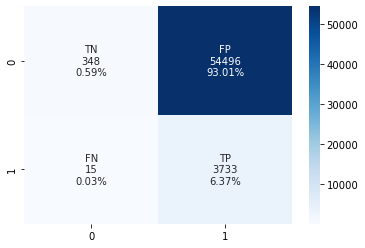

In [21]:
names = ['TN','FP','FN','TP']
counts = ["{0:0.0f}".format(value) for value in conf_mat_flatten]
total = conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1]
percentages = ["{0:.2%}".format(value/total) for value in conf_mat_flatten]
labels = [f"{n}\n{c}\n{p}" for n, c, p in zip(names,counts,percentages)]
labels = [[labels[0],labels[1]],[labels[2],labels[3]]]
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

In [1]:
def log(x,base):
    result = ln(x)/ln(base)
    return result

def ln(x):
    n = 100000.0
    return n * ((x ** (1/n)) - 1)